In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from utils import scenarioa
from utils import baseline_model as baseline
from utils import paths_helper as paths
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


%matplotlib inline

plt.style.use('seaborn-whitegrid')

Using TensorFlow backend.


In [ ]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

#trial = FinCapstone(ticker_list=["GLW","HIMX","GLUU"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
trial = FinCapstone(ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "DIS", "NFLX", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=False)
#trial = FinCapstone(ticker_list_samplesize=200, timespan=timespan, timespan_ab=timespan_ab, date_from=date_from)

trial.run_initial_dataload()
trial.feature_engineering()
trial.train()
trial.evaluate()

(1/33) Recv. and Stored ZHNE
(2/33) Recv. and Stored BSFT
(3/33) Recv. and Stored AERO
(4/33) Recv. and Stored MATR
(5/33) Recv. and Stored ITMSF
(6/33) Recv. and Stored FIT
(7/33) Recv. and Stored TIPT
(8/33) Recv. and Stored OLBK
(9/33) Recv. and Stored QADA
(10/33) Recv. and Stored ATTU
(11/33) ERROR receiving LGF
(12/33) Recv. and Stored STX
(13/33) Recv. and Stored TPCS
(14/33) Recv. and Stored GSAT


In [181]:
_ticker = "GLW"
trial.model_name

'ExampleFintech'

In [22]:
model = baseline.create_model()

In [23]:
model.load_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, "baseline", trial.model_name, _ticker))

In [25]:
features = trial.load_baseline_features(_ticker, True).set_index("Date")
labels = trial.load_baseline_labels(_ticker, True).set_index("Date")

In [54]:

X_train, y_train, X_test, y_test = baseline.prepare_problemspace(features, labels, trial.train_from, trial.train_until, trial.test_from, "pandas")
dates = X_test.index.tolist()
returns = y_test.columns.tolist()

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values


In [147]:
y_pred = model.predict(X_test, verbose=0)

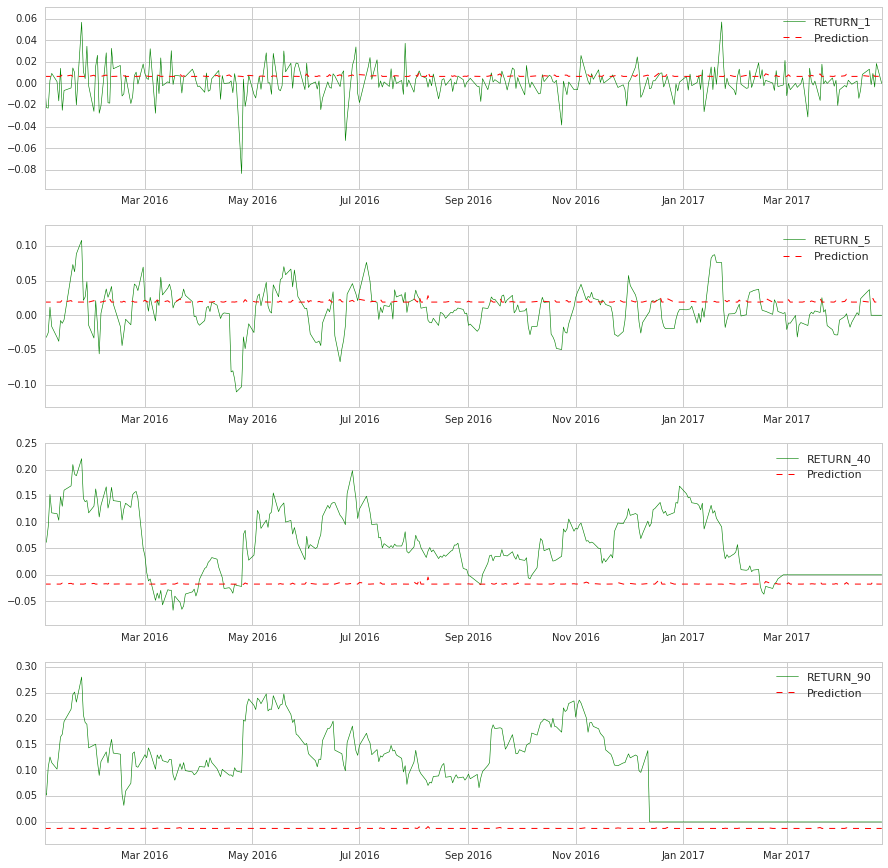

In [116]:
def plot_prediction(x, y_test, y_pred):
    main_ax = []
    # setup figure
    fig = plt.figure(figsize=(15, 15))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    for itr in range(y_pred.shape[1]):
        main_ax.append(fig.add_subplot(grid[itr, :]))

    for itr in range(y_pred.shape[1]):
        #Main Plot
        main_ax[itr].plot(x, y_test[:,itr], '-g', linewidth=0.6, label=returns[itr])
        main_ax[itr].plot(x, y_pred[:,itr], '--r', linewidth=1, label="Prediction")
        main_ax[itr].legend(prop={'size':11})
        #y_range = main_ax[itr].get_ylim()
        #y_padding = (y_range[1] - y_range[0]) * 0.05
        #main_ax[itr].set_ylim([y_range[0] - y_padding, y_range[1] + y_padding])
        main_ax[itr].margins(0, 0.1)

    #setting legends

    

    plt.show()

plot_prediction(dates, y_test, y_pred)

In [132]:
gain_test = (y_test > 0.0) * 1.0
gain_pred = (y_pred > 0.0) * 1.0

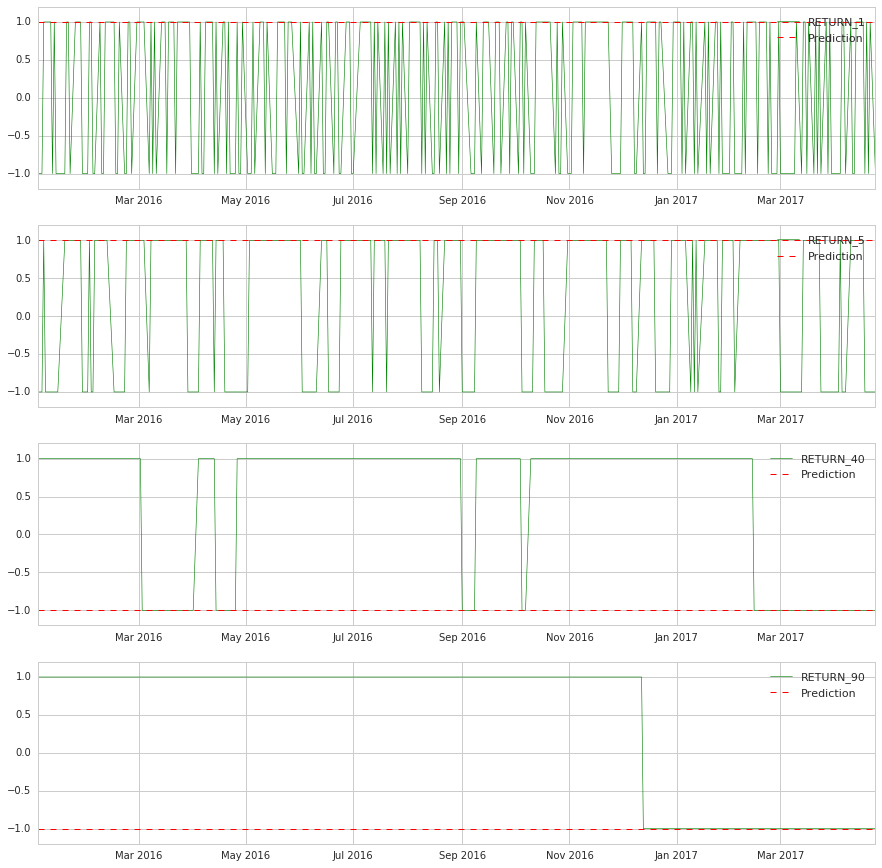

In [133]:
plot_prediction(dates, (gainloss_test - 0.5) * 2.0, (gainloss_pred - 0.5) * 2.0)

In [137]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [145]:
r2s = r2_score(y_test, y_pred)
accs = accuracy_score(gain_test, gain_pred)
print("R^2 : %s" % r2s)
print("Acc : %s" % accs)

R^2 : -1.85216705601
Acc : 0.0425531914894


/opt/conda/lib/python3.5/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [174]:
_r = baseline.evaluate(model, X_test, y_test, return_type="pandas")
_r

,accuracy,r_squared
0,0.042553,-1.059763


In [182]:
trial.valid_ticker_list()

['GLW', 'HIMX', 'GLUU']

In [183]:
evals = dict()
model = baseline.create_model()
for itr_ticker in trial.valid_ticker_list():
    model.load_weights("{}/weights{}_{}_{}.h5".format(paths.TEMP_PATH, "baseline", trial.model_name, itr_ticker))
    
    features = trial.load_baseline_features(_ticker, True).set_index("Date")
    labels = trial.load_baseline_labels(_ticker, True).set_index("Date")
    
    X_train, y_train, X_test, y_test = baseline.prepare_problemspace(features, labels, trial.train_from, trial.train_until, trial.test_from, "pandas")

    X_train = X_train.values
    y_train = y_train.values
    X_test = X_test.values
    y_test = y_test.values
    
    y_pred = model.predict(X_test, verbose=0)
    
    evals[itr_ticker] = baseline.evaluate(model, X_test, y_test, return_type="dict")

In [189]:
pd.DataFrame.from_dict(evals, orient="index")

,accuracy,r_squared
GLUU,0.136778,-0.206084
GLW,0.072948,-1.036806
HIMX,0.288754,-0.153389


In [199]:
evals = trial.evaluate_baseline()

In [207]:
evals.mean()

accuracy     0.057751
r_squared   -0.743870
dtype: float64